# Accident Severity Prediction

<b> Importing necessary libraries </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

<b> Importing the dataset and dropping rows with null values </b>

In [2]:
df=pd.read_csv("dataset.csv")
df=df.dropna()
df.head()

C:\Users\tulik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0


<b> Selecting columns/attributes that can be recorded from sensor inputs </b>

Columns in the new dataset:
Pedestrian Movement: can be recorded via IR(Infrared) sensors. <br /> 
Vehicle Type: to be recorded for improving predictions. <br /> 
Light Conditions: can be recorded via LDR(Light Dependent Resistor) sensors. <br /> 
Junction Location, Junction Detail, Junction Control: based on which junction's IR sensor recorded this accident activity. <br /> 
Did Police Officer Attend the Scene of Accident: to be recorded. <br /> 
Age of Vehicle, Age of Driver, Sex of Driver: to be recorded for improving predictions. <br /> 
<br /> 
Accident Severity Score: To be predicted(1-Fatal, 2-Serious, 3-Slight) <br /> 

In [3]:
df2 = df[['pedestrian_movement','vehicle_type','light_conditions','junction_location', 'junction_detail','junction_control','did_police_officer_attend_scene_of_accident','accident_severity','age_of_vehicle','sex_of_driver','age_of_driver']]
df2.replace(-1, np.nan, inplace=True) 
df2=df2.dropna() #drop rows with null values
df2.shape

C:\Users\tulik\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


(68246, 11)

<b> Producing a heatmap of the selected features </b> <br /> 
In a heatmap, the darker shades of the chart represent higher values than the lighter shade.

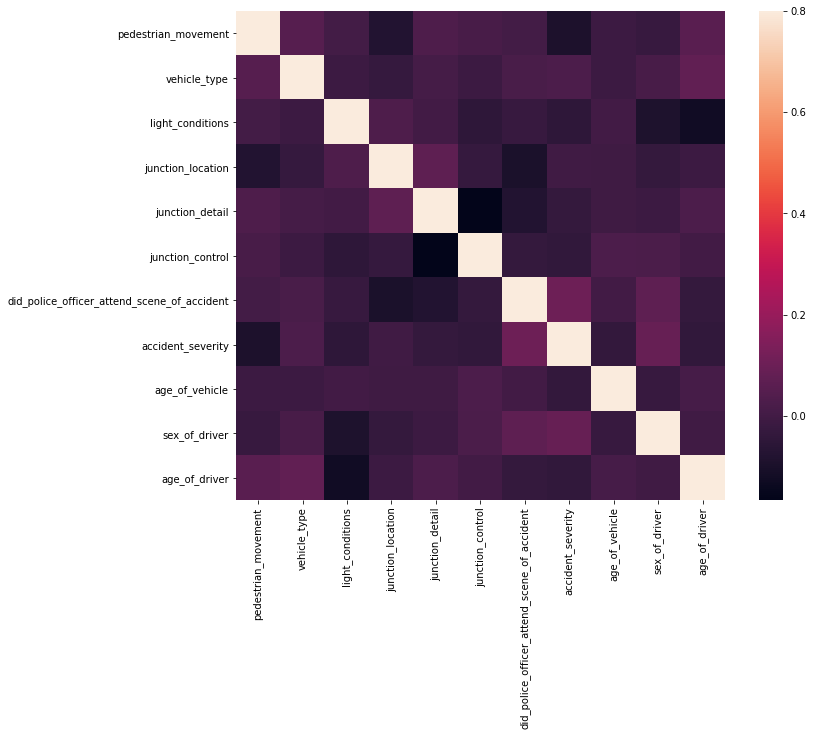

In [4]:
import matplotlib.pyplot as plt
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

<b> Pearson Correlation Matrix </b> <br /> 
To identify the amount of linear relationship between variables in order to gain insight into data. A value of 1 is represented by beige and shows a completely positive linear correlation. Dark purple represents a zero that suggests no linear correlation.

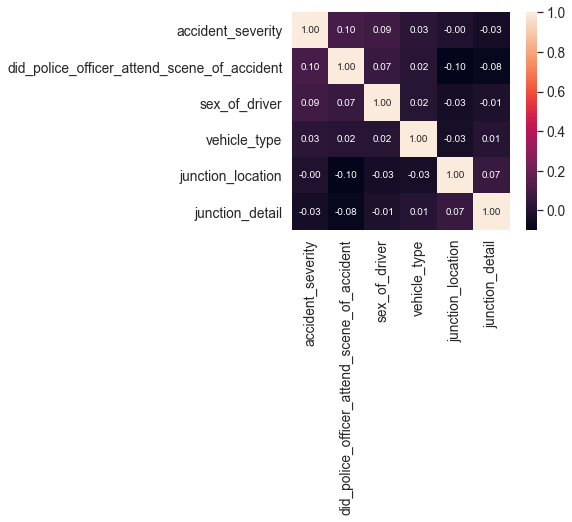

In [5]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'accident_severity')['accident_severity'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
df2.head()

,pedestrian_movement,vehicle_type,light_conditions,junction_location,junction_detail,junction_control,did_police_officer_attend_scene_of_accident,accident_severity,age_of_vehicle,sex_of_driver,age_of_driver
6,0.0,3.0,7,2.0,6.0,2.0,1.0,3,8.0,2.0,27.0
8,2.0,9.0,1,1.0,3.0,2.0,1.0,3,1.0,1.0,24.0
14,0.0,9.0,1,8.0,6.0,4.0,1.0,3,1.0,2.0,23.0
25,0.0,9.0,1,8.0,3.0,4.0,1.0,3,8.0,2.0,48.0
26,3.0,9.0,1,8.0,3.0,4.0,1.0,3,7.0,2.0,47.0


In [7]:
df= df[:15000]
df2= df2[:15000] #keep 15000

In [8]:
Y = df2.accident_severity.values
Y1 = df.accident_severity.values
Y

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [9]:
cols = df2.shape[1]
X = df2.loc[:, df2.columns != 'accident_severity']
X1 = df.loc[:, df.columns != 'accident_severity']
X.columns

Index(['pedestrian_movement', 'vehicle_type', 'light_conditions',
       'junction_location', 'junction_detail', 'junction_control',
       'did_police_officer_attend_scene_of_accident', 'age_of_vehicle',
       'sex_of_driver', 'age_of_driver'],
      dtype='object')

In [10]:
print(X.shape)
print(X1.shape)

(15000, 10)
(15000, 69)


In [11]:
# Support Vector Machines
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.33, random_state=99)

<b> Fitting the prediction model and calculating accuracy </b>

In [13]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
print("Accuracy using SVM=", acc_svc)

Accuracy using SVM= 92.06


<b> Test Input </b>

The test inputs include the following: <br />
<br />
Pedestrian Movement = 1.0 = Crossing from driver's nearside <br />
Vehicle Type = 2.0 = Motorcycle 50cc and under <br />
Light Conditions = 4 = Darkness - lights lit <br />
Junction Location = 1.0 = Approaching junction or waiting/parked at junction approach <br />
Junction Detail = 6.0 = Crossroads <br />
Junction Control = 2.0 = Auto traffic signal <br />
Did Police Officer Attend The Accident Scene = 1.0 = Yes <br />
Age of Vehicle = 6.0 = 6 years old <br />
Sex of Driver = 1.0 = Male <br />
Age of Driver = 24.0 = 24 years old <br />

In [15]:
#input[[pedestrian_movement, vehicle_type, light_conditions, junction_location, junction_detail, junction_control, did_police, age_of_vehicle, sex_of_driver, age_of_driver]]
input = [[1.0, 2.0, 4, 1.0, 6.0, 2.0, 1.0, 6.0, 1.0, 24.0]]
output=svc.predict(input)
print(output)

[3]


The model predicts the accident severity to be 3 i.e. <b> Slight Accident </b>